# Principal Component Analysis
Perform Principal component analysis and perform clustering using first 3 principal component scores (both heirarchial and k mean #clustering(scree plot or elbow curve) and obtain optimum number of clusters and check whether we have obtained same number of clusters with the original data (class column we have ignored at the begining who shows it has 3 clusters)df


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
sns.set_theme(style='darkgrid')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 200
%matplotlib inline

In [4]:
df = pd.read_csv('wine.csv')
df


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# Understanding the distribution of data with 4D!¶

Text(0, 0.5, 'Malic')

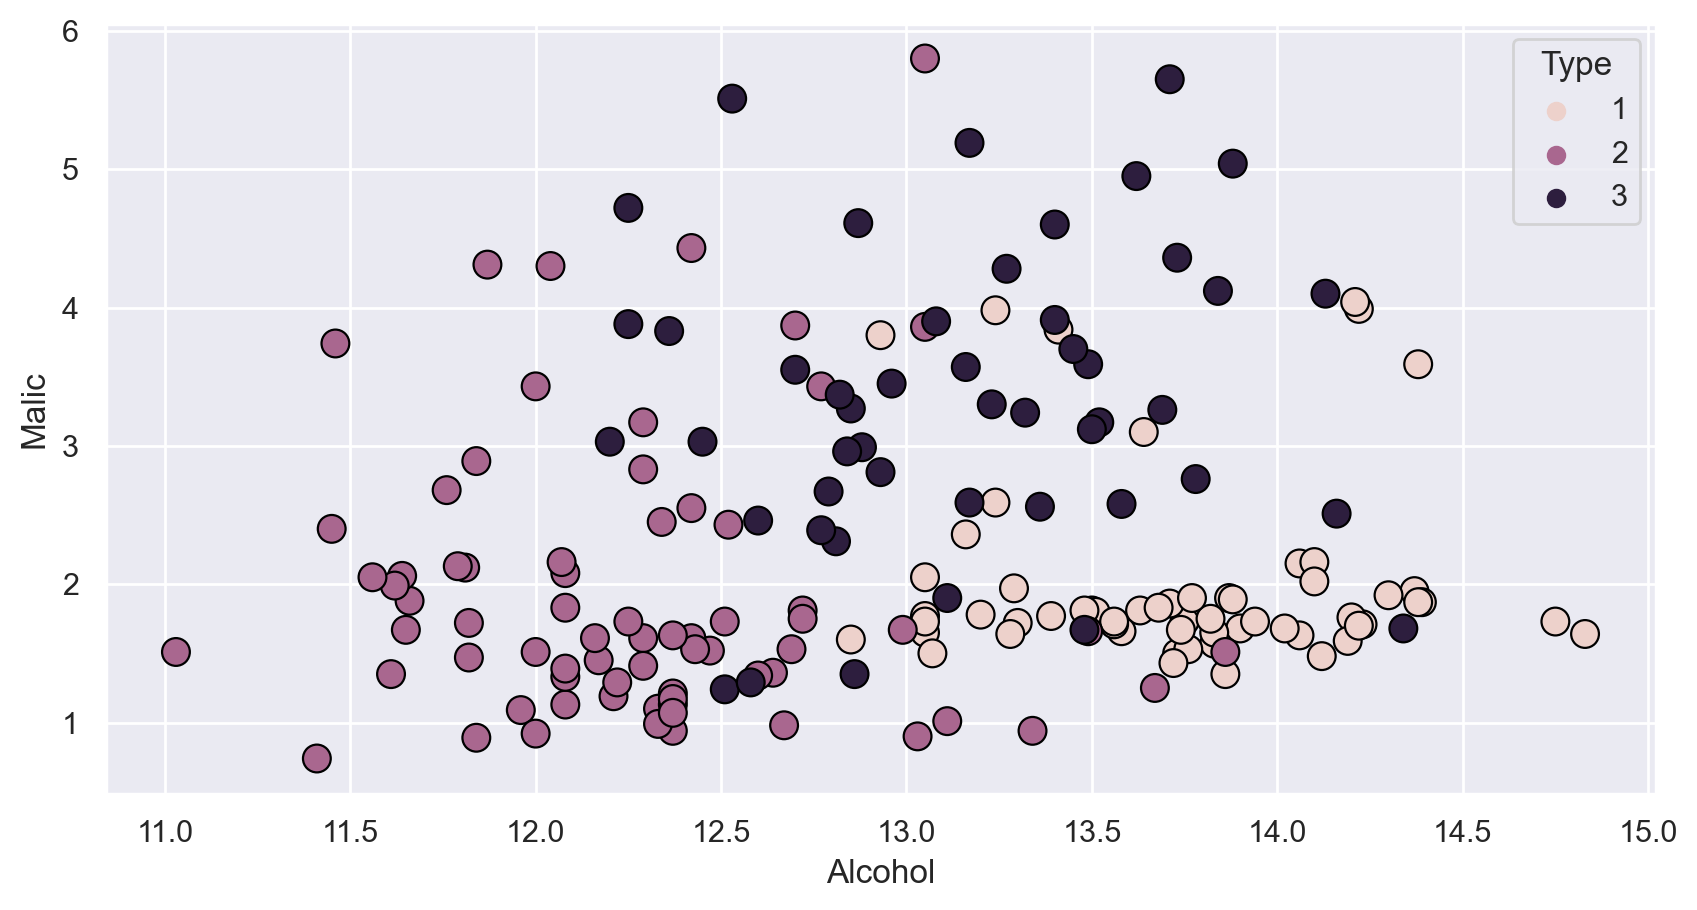

In [5]:
sns.scatterplot(x = df['Alcohol'], y = df['Malic'], hue=df['Type'], s = 100, edgecolor = 'black')
plt.xlabel('Alcohol')
plt.ylabel('Malic')

Text(0, 0.5, 'Color')

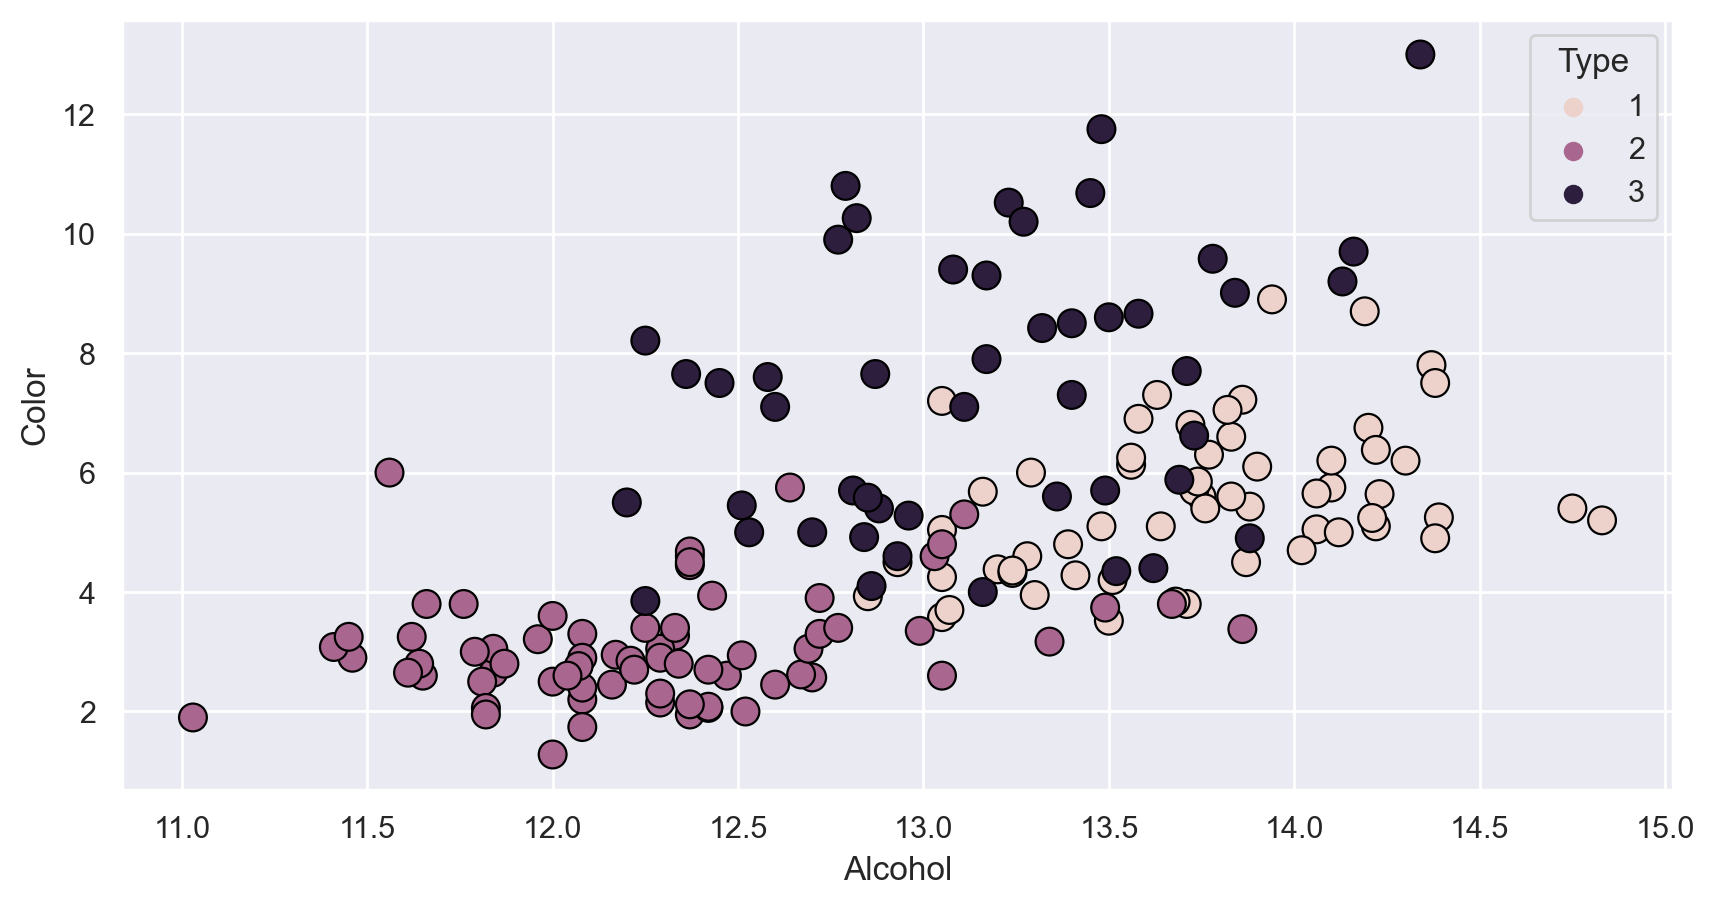

In [6]:
sns.scatterplot(x = df['Alcohol'], y = df['Color'], hue=df['Type'], s = 100, edgecolor = 'black')
plt.xlabel('Alcohol')
plt.ylabel('Color')

In [7]:
x = df.iloc[:,1:]
y = df['Type']

In [8]:
x

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [9]:
x.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


# PCA

In [10]:
sc = StandardScaler()

x = sc.fit_transform(x)
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.382808e-16,-1.197544e-16,-8.370333e-16,-3.991813e-17,-3.991813e-17,0.000000,-3.991813e-16,3.592632e-16,-1.197544e-16,2.494883e-17,1.995907e-16,3.193450e-16,-1.596725e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-0.885468,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,0.095960,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,0.808997,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [12]:
pca = PCA()
pcs = pca.fit_transform(x)

In [13]:
pd.DataFrame(pcs)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097,-0.022498,-0.304117,0.139228,0.170786,-0.114427
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427,-0.097969,-0.206061,0.258198,-0.279431,-0.187371
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024,0.001222,-0.247997,0.512492,0.698766,0.072078
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,0.057448,0.491490,0.299822,0.339821,-0.021866


In [14]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [15]:
np.cumsum(pca.explained_variance_ratio_)

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

Text(0.5, 1.0, 'Scree Plot')

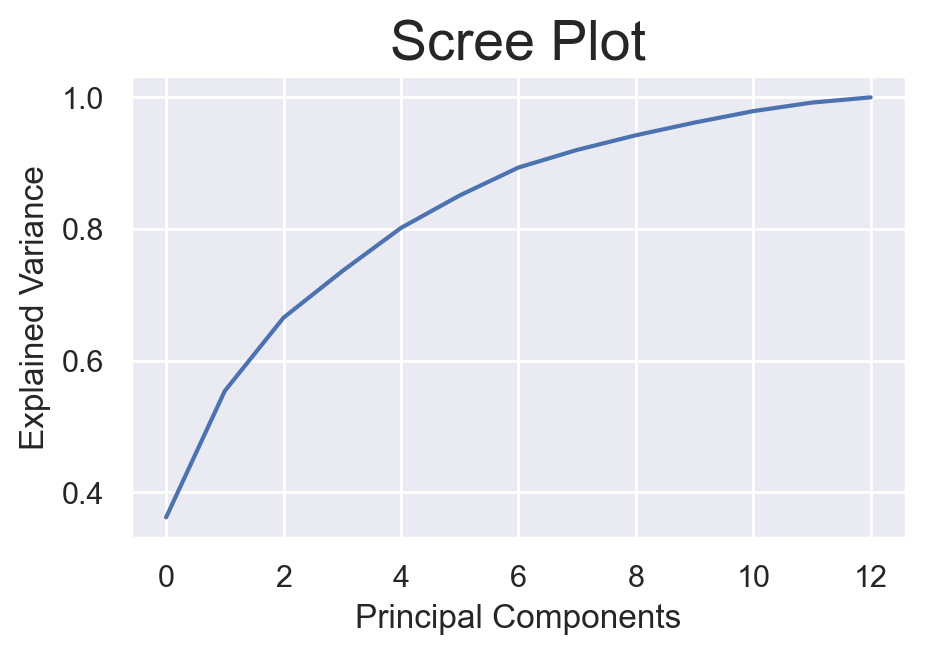

In [16]:
plt.figure(figsize=(5,3),dpi=200)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot', size = 20)

In [17]:
pca = PCA(n_components=6)  #from scree plot n_components=6)
pcs = pca.fit_transform(x)
pcs

array([[ 3.31675081, -1.44346263, -0.16573904, -0.21563119,  0.69304284,
        -0.22388013],
       [ 2.20946492,  0.33339289, -2.02645737, -0.29135832, -0.25765463,
        -0.92712024],
       [ 2.51674015, -1.0311513 ,  0.98281867,  0.72490231, -0.25103312,
         0.54927605],
       ...,
       [-2.67783946, -2.76089913, -0.94094188,  0.31203475,  1.271355  ,
         0.27306792],
       [-2.38701709, -2.29734668, -0.5506962 , -0.68828455,  0.81395522,
         1.17878298],
       [-3.20875816, -2.76891957,  1.01391366,  0.59690319, -0.89519259,
         0.29609218]])

In [18]:
data = pd.DataFrame(pcs,columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
data

,PC1,PC2,PC3,PC4,PC5,PC6
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520
...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783


In [19]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Type, Length: 178, dtype: int64

In [20]:
data['Class'] = y

In [21]:
data

,PC1,PC2,PC3,PC4,PC5,PC6,Class
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,1
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,1
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,1
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,1
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,1
...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,3
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,3
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,3
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,3


In [22]:
data['PC1'].mean()

0.0

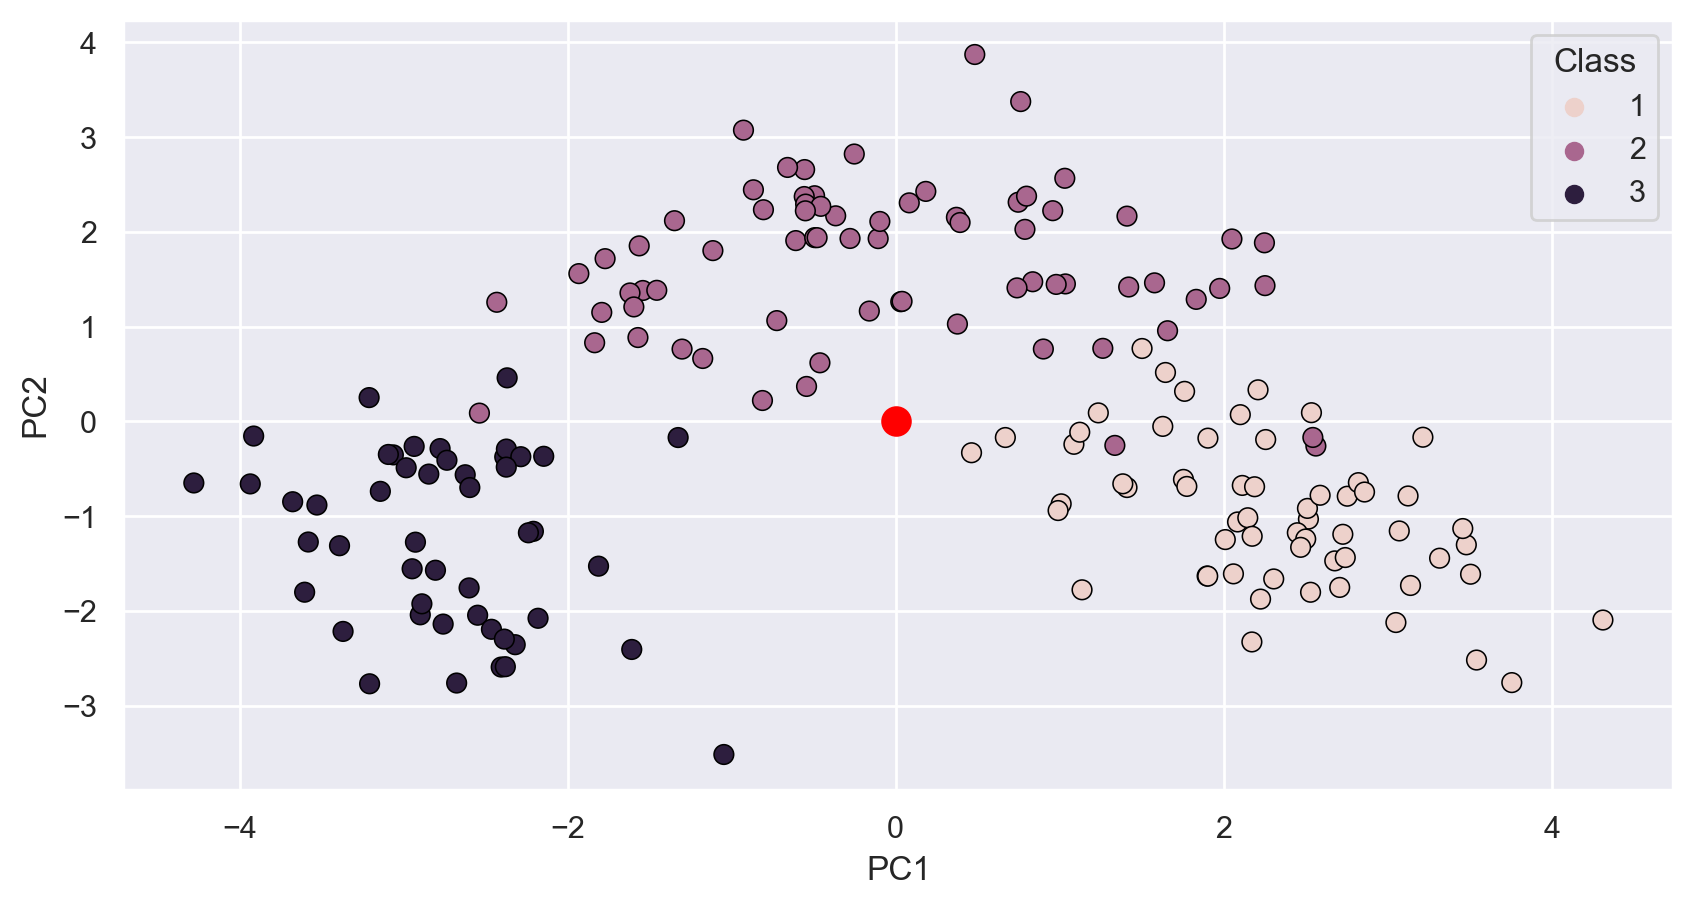

In [23]:
sns.scatterplot(x = data['PC1'], y = data['PC2'],s = 50, edgecolor = 'black',hue=data['Class'])
plt.scatter(pcs[:,0].mean(),pcs[:,1].mean(), s = 100,c = 'red')

In [89]:
data

,PC1,PC2,PC3,Class
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,3
174,-2.601956,-1.757229,0.207581,3
175,-2.677839,-2.760899,-0.940942,3
176,-2.387017,-2.297347,-0.550696,3


In [ ]:
#Logistic Regression 

In [ ]:
x = data.iloc[:,:-1]
y = data['Class']

In [90]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [91]:
lg = LogisticRegression()

lg.fit(xtrain,ytrain)
ypred = lg.predict(xtest)

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00         9

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



# Now we are using only first 3 PCA

In [42]:
pca = PCA(n_components=3)  #from scree plot n_components=3)
pcs = pca.fit_transform(x)
pcs

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01],
       [ 3.47973668e+00, -1.30233324e+00, -4.22735217e-01],
       [ 1.75475290e+00, -6.11977229e-01, -1.19087832e+00],
       [ 2.11346234e+00, -6.75706339e-01, -8.65086426e-01],
       [ 3.45815682e+00, -1.13062988e+00, -1.20427635e+00],
       [ 4.31278391e+00, -2.09597558e+00, -1.26391275e+00],
       [ 2.30518820e+00, -1.66255173e+00,  2.17902616e-01],
       [ 2.17195527e+00, -2.32730534e+00

In [33]:
data_3 = pd.DataFrame(pcs,columns=['PC1','PC2','PC3'])
data_3

,PC1,PC2,PC3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


In [35]:
data_3['PC1'].mean()

0.0

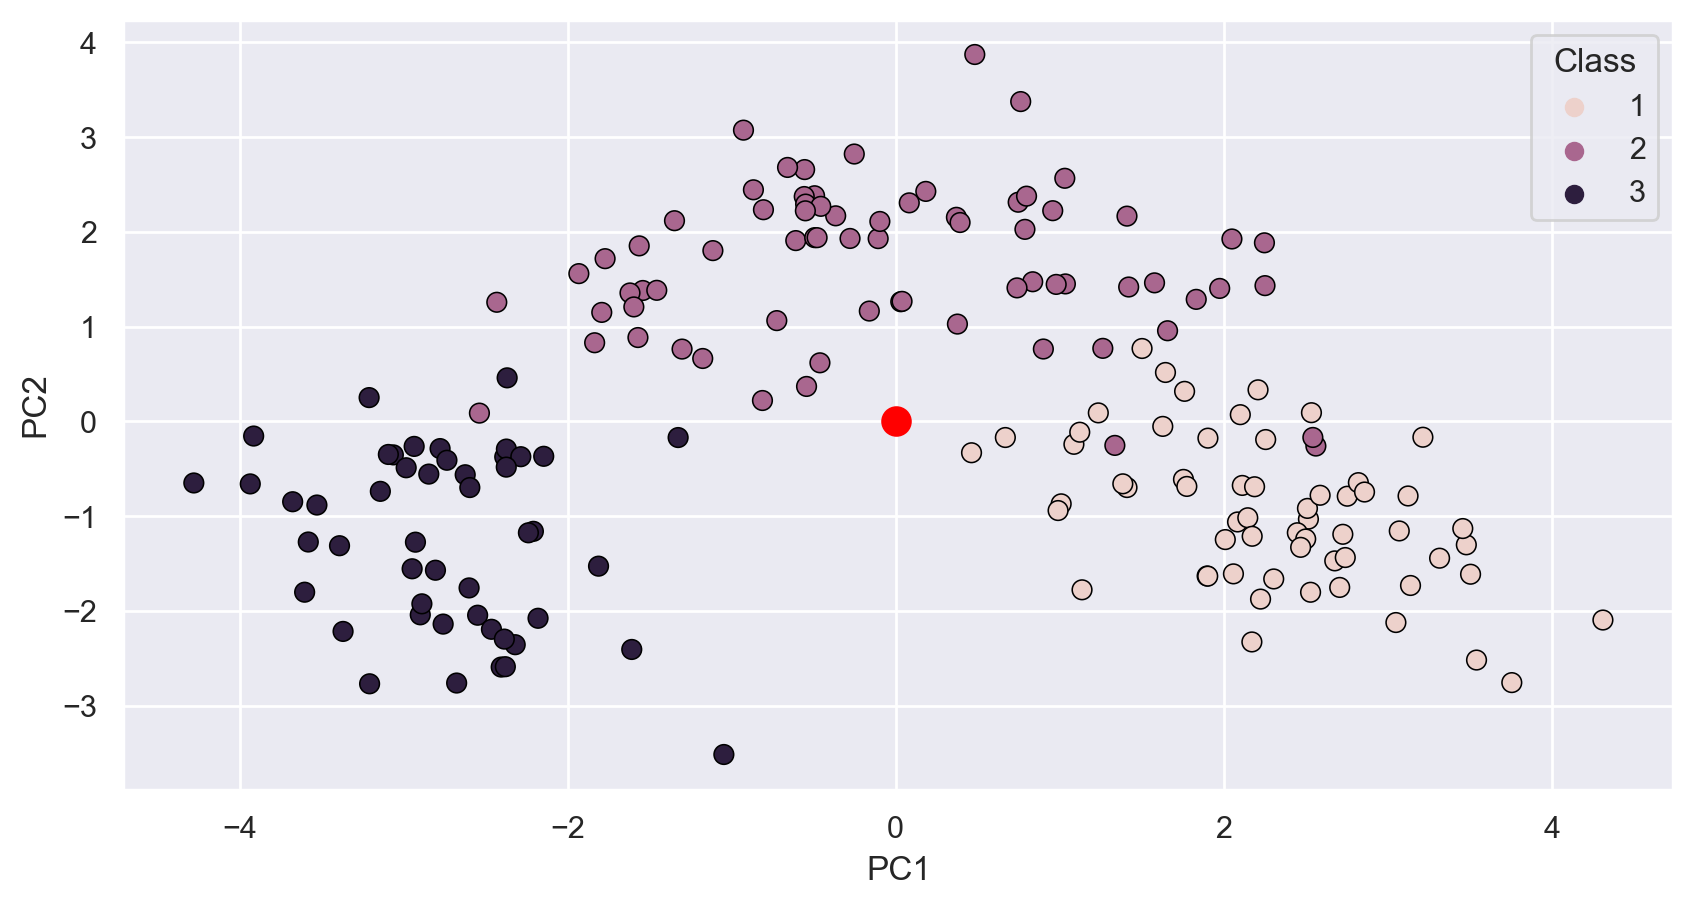

In [37]:
sns.scatterplot(x = data_3['PC1'], y = data_3['PC2'],s = 50, edgecolor = 'black',hue=data['Class'])
plt.scatter(pcs[:,0].mean(),pcs[:,1].mean(), s = 100,c = 'red')

# We are checking how many cluster we get using PC1 PC2 and PC3 using hierarchical clustering

ANS : We got  4 cluster using complete linkage

In [ ]:
#Dendrogram with single and complete linkage

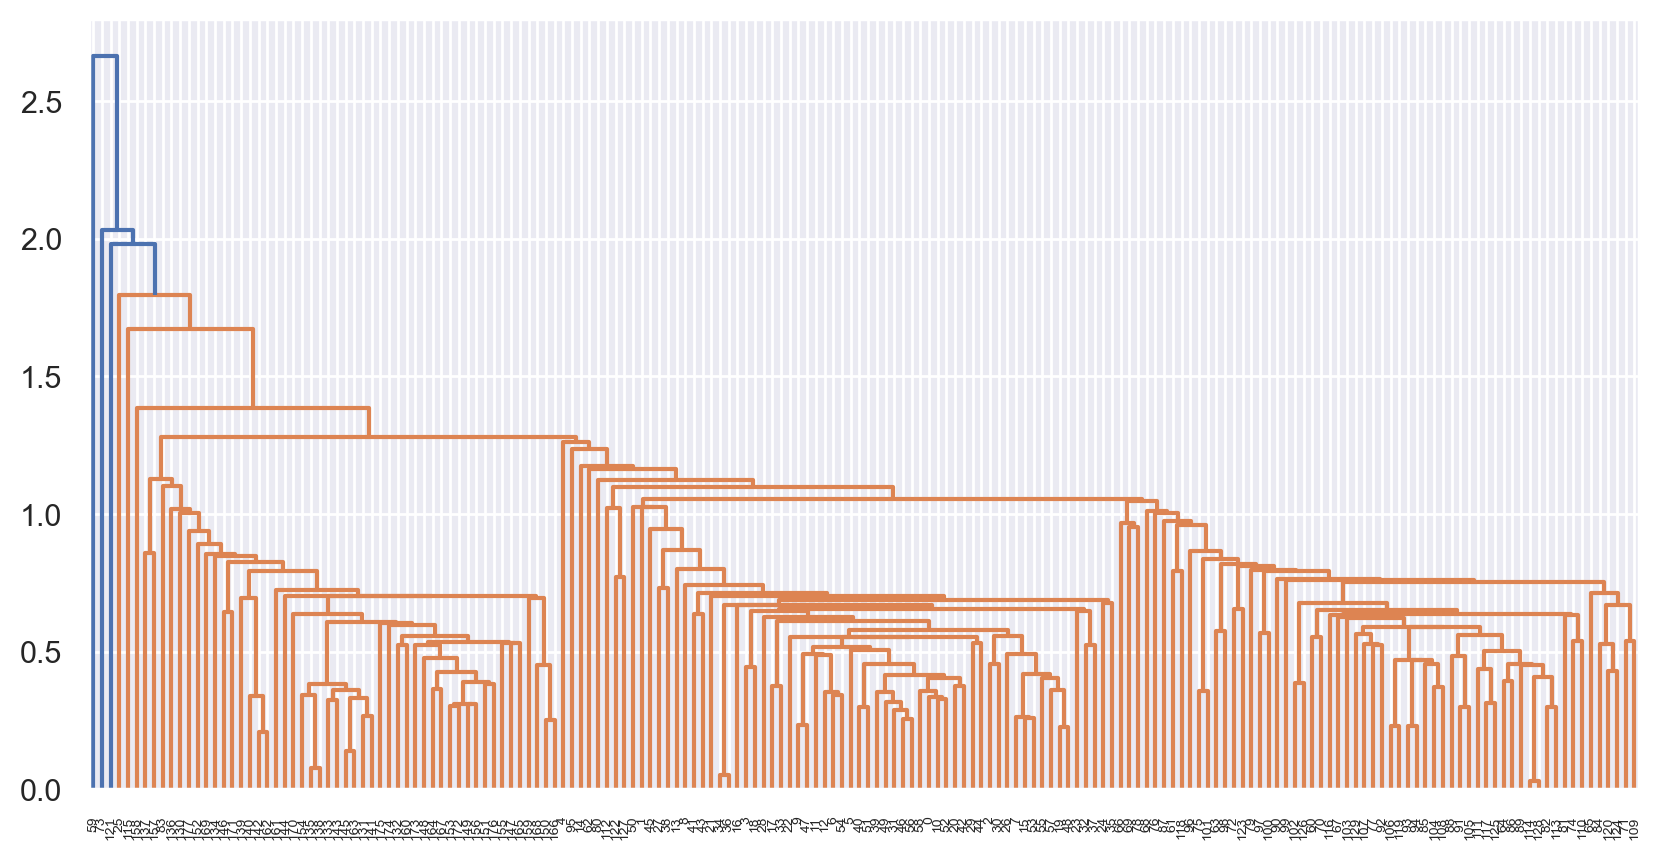

In [38]:
lk = hierarchy.linkage(data_3, method='single')
dendrogram = hierarchy.dendrogram(lk)

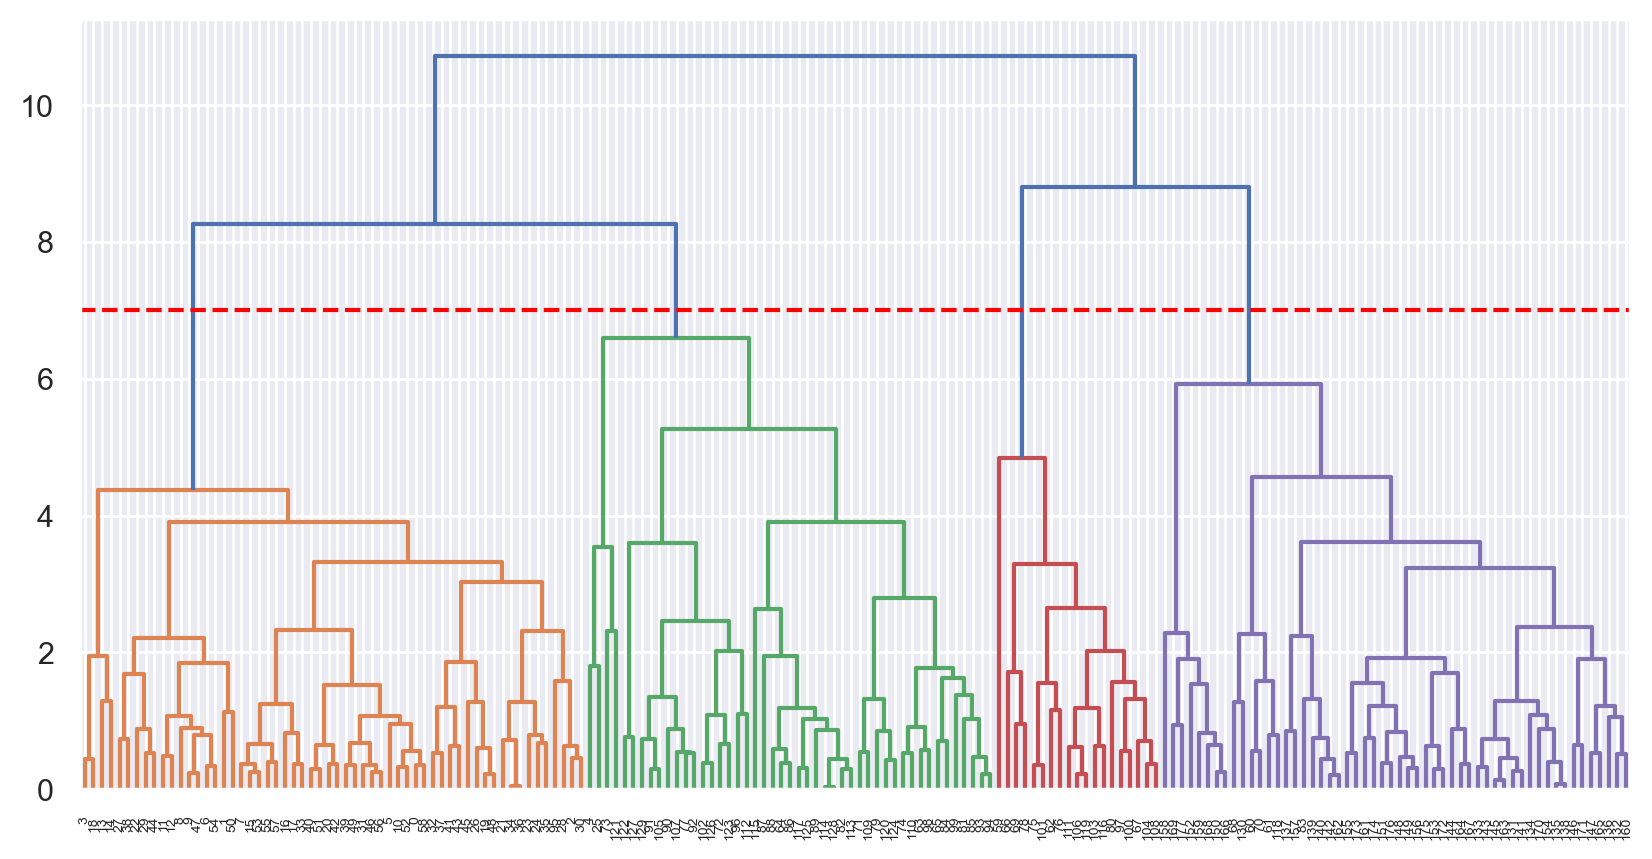

In [40]:
lk = hierarchy.linkage(data_3, method='complete')
dendrogram = hierarchy.dendrogram(lk)
plt.axhline(y = 7, linestyle = '--', color = 'red')

# We are checking how many cluster we get using original data using hierarchical clustering

ANS : We got  4 cluster using hierarchical clustering and complete linkage

In [ ]:
#Dendrogram with single and complete linkage

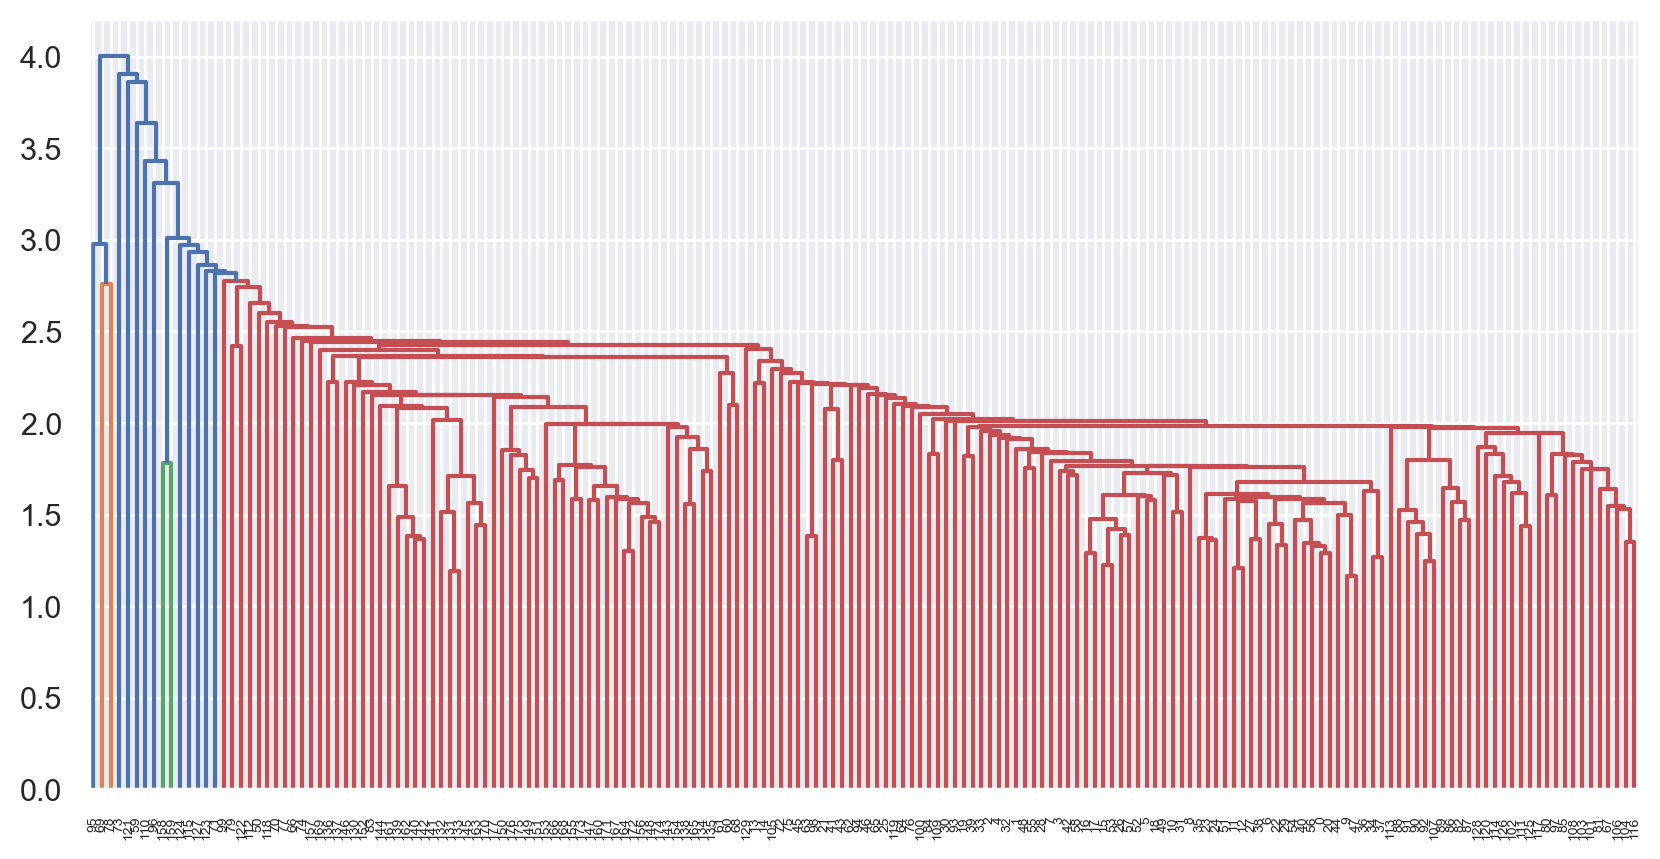

In [44]:
lk = hierarchy.linkage(x, method='single')
dendrogram = hierarchy.dendrogram(lk)

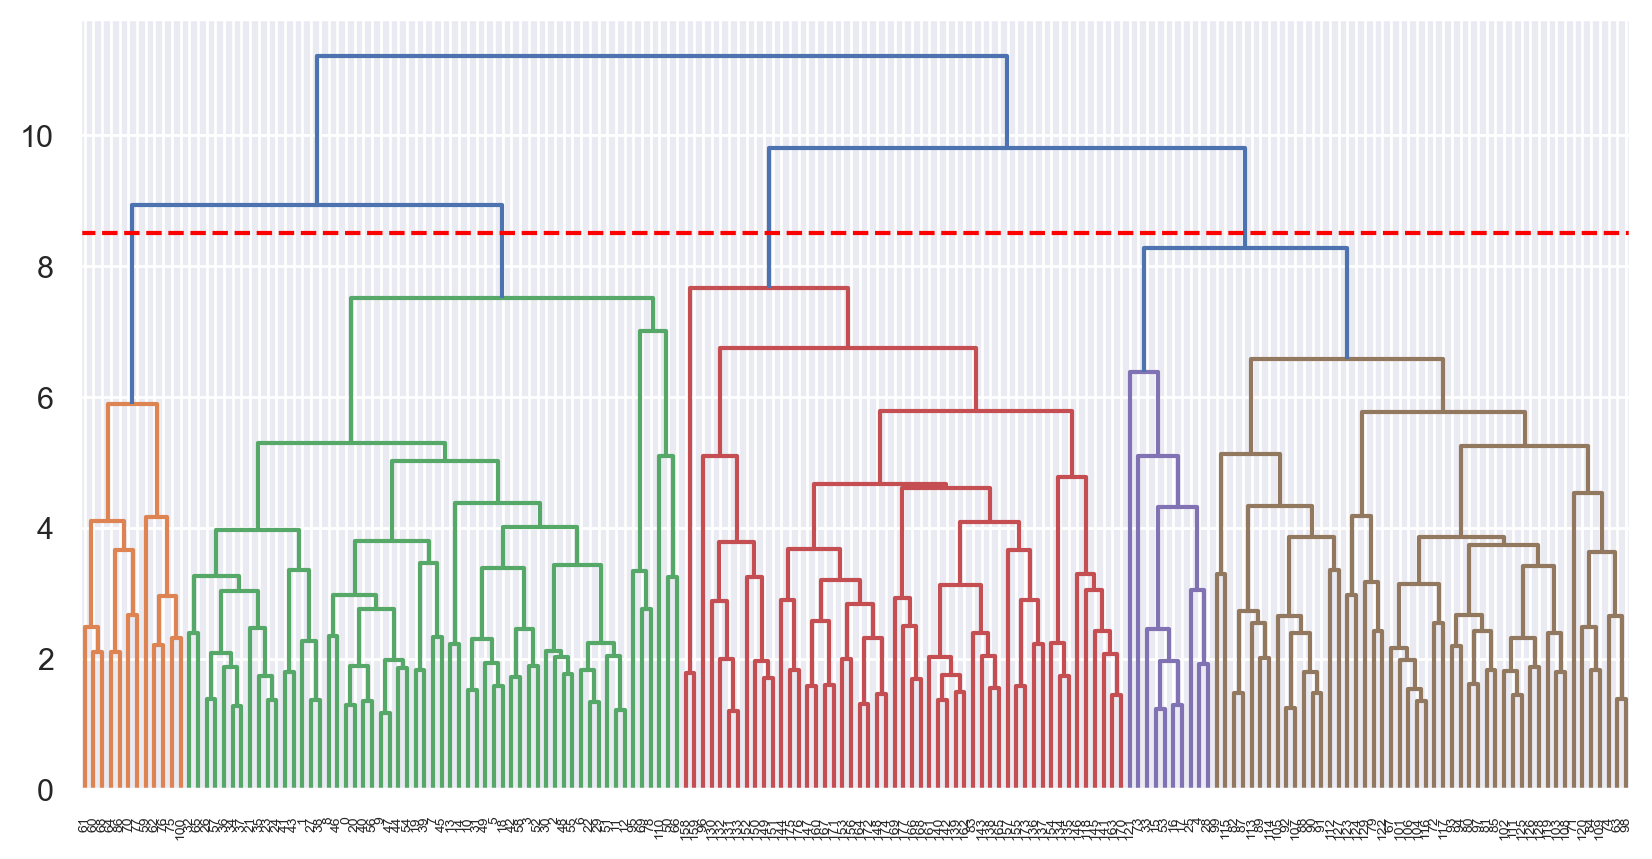

In [50]:
lk = hierarchy.linkage(x, method='complete')
dendrogram = hierarchy.dendrogram(lk)
plt.axhline(y = 8.5, linestyle = '--', color = 'red')

# We are checking how many cluster we get using PC1 PC2 and PC3 using K-Means

ANS : We got  5 cluster using K Means,silhouette_score is 0.408

In [53]:
km = KMeans()
yp = km.fit_predict(data_3)
yp

C:\Users\AdmiN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\AdmiN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 4, 1, 1, 6, 1, 1, 1, 4, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4,
       4, 4, 4, 6, 4, 4, 1, 4, 1, 1, 4, 1, 4, 4, 4, 4, 4, 1, 1, 4, 1, 4,
       4, 1, 1, 4, 1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 1, 7, 5, 0, 7, 2, 5, 2,
       7, 7, 5, 4, 5, 2, 5, 6, 2, 7, 7, 5, 4, 2, 7, 2, 5, 0, 2, 2, 5, 5,
       5, 5, 5, 5, 5, 2, 2, 1, 5, 7, 2, 2, 7, 7, 5, 7, 7, 5, 7, 5, 7, 2,
       2, 5, 5, 5, 5, 2, 7, 5, 0, 7, 2, 6, 5, 5, 2, 5, 5, 5, 5, 5, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 3, 3, 3,
       3, 3])

In [54]:
len(yp)

178

In [55]:
km.inertia_

267.78842341525126

# Elbow graph

In [ ]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(data_3)
    wcss.append(km.inertia_)

In [63]:
wcss

[1645.823704907407,
 927.3413280534478,
 518.4534750902317,
 434.1733929441647,
 376.36108641166595,
 335.7718133321988,
 302.837545247813,
 267.324122749933,
 242.98033960935044,
 229.1553147212979]

Text(0.5, 1.0, 'Elbow Graph')

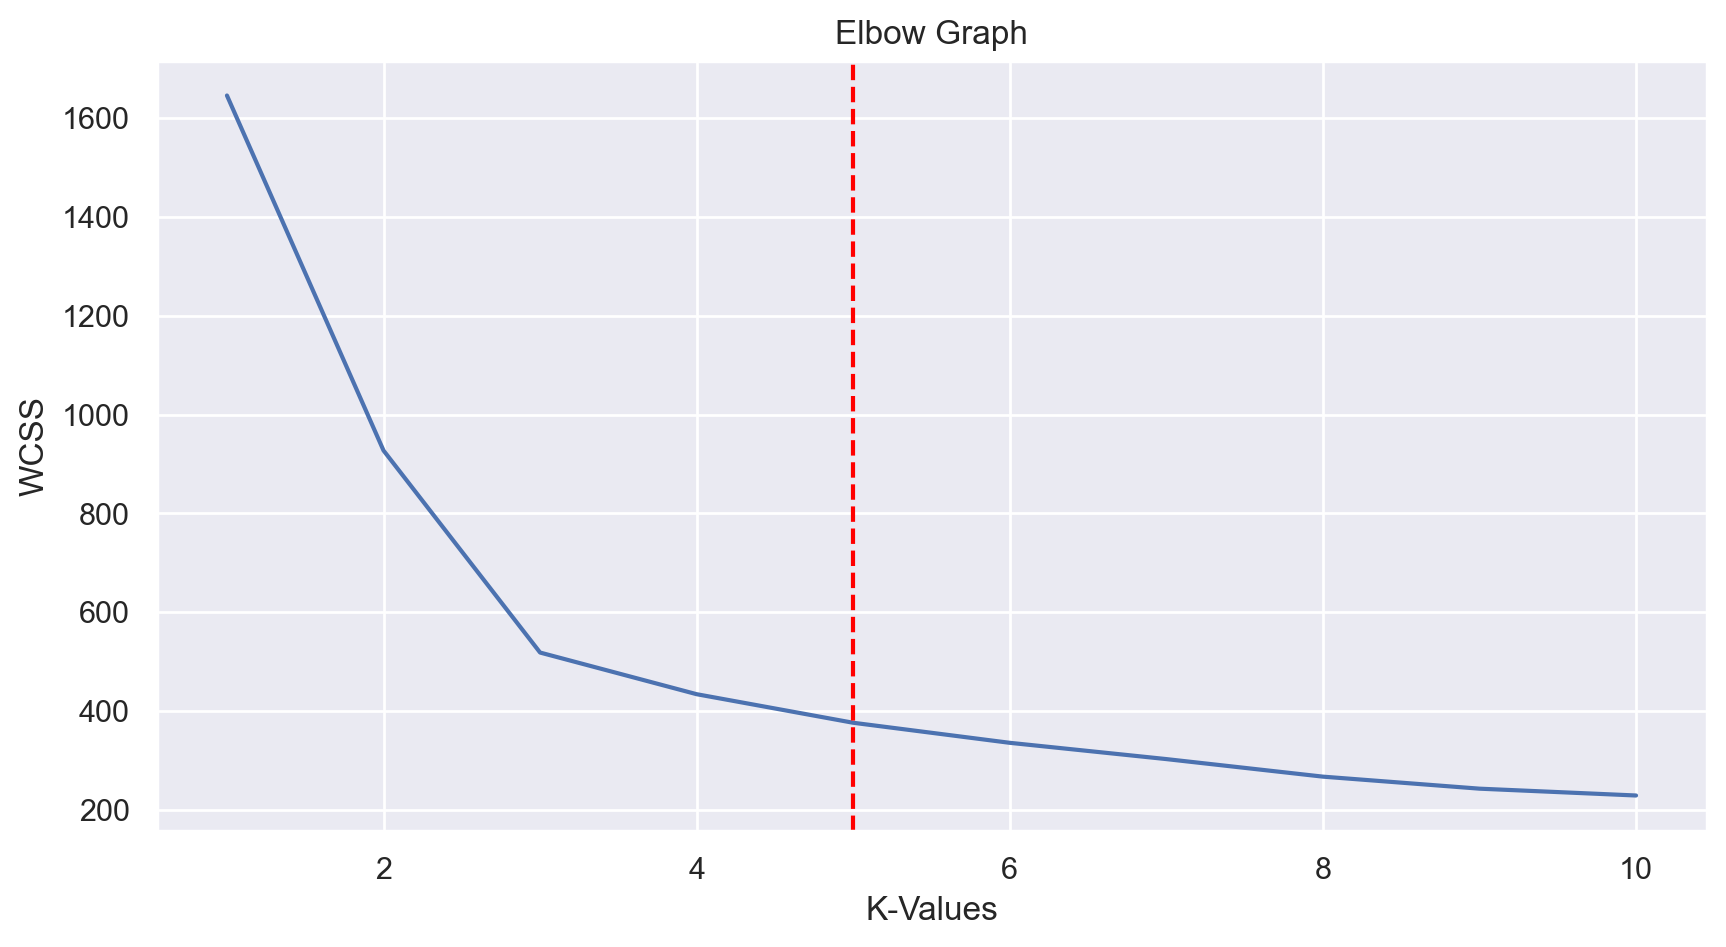

In [64]:
plt.plot(range(1,11),wcss)
plt.axvline(x = 5, linestyle = '--', color = 'red')
plt.xlabel('K-Values')
plt.ylabel('WCSS')
plt.title('Elbow Graph')

# Using n_cluster=5 we are building model 

In [69]:
km = KMeans(n_clusters=5)
yp = km.fit_predict(data_3)
yp

C:\Users\AdmiN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\AdmiN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 2, 3,
       3, 3, 2, 3, 2, 0, 2, 0, 3, 2, 3, 2, 3, 0, 3, 3, 2, 4, 3, 3, 2, 0,
       2, 2, 2, 2, 2, 3, 3, 1, 0, 3, 3, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 0,
       3, 2, 0, 2, 2, 3, 2, 2, 2, 2, 3, 0, 0, 2, 0, 2, 2, 0, 2, 2, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4])

In [88]:
silhouette_score(data_3,yp)

0.4033253755588435

# We are checking how many cluster we get using original input x using K-Means

ANS : We got  5 cluster using K Means

In [70]:
km = KMeans()
ypred = km.fit_predict(x)
ypred

C:\Users\AdmiN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\AdmiN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 4, 2, 2, 3, 2, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 3, 3, 2, 4, 2, 4,
       4, 4, 4, 3, 4, 4, 3, 4, 3, 2, 4, 3, 4, 4, 4, 4, 4, 2, 2, 4, 2, 5,
       2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 6, 1, 7, 6, 5, 1, 5,
       6, 6, 7, 6, 7, 5, 1, 3, 5, 6, 6, 7, 6, 5, 6, 6, 1, 7, 5, 6, 1, 1,
       1, 1, 1, 1, 1, 5, 5, 3, 5, 6, 5, 5, 6, 6, 5, 6, 6, 1, 6, 1, 6, 5,
       5, 5, 1, 1, 1, 1, 6, 5, 7, 5, 5, 3, 5, 5, 5, 5, 5, 1, 5, 5, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 7, 7, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 7, 7, 7, 0, 7, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0,
       0, 0])

In [71]:
km.inertia_

949.2005520788565

# Elbow Graph

In [ ]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [74]:
wcss

[2314.0,
 1659.0079672511501,
 1277.9284888446423,
 1175.501001765632,
 1107.0812679272924,
 1055.1940881719192,
 1001.5897003486548,
 930.4903869131099,
 890.3278769126085,
 846.4022781067504]

Text(0.5, 1.0, 'Elbow Graph')

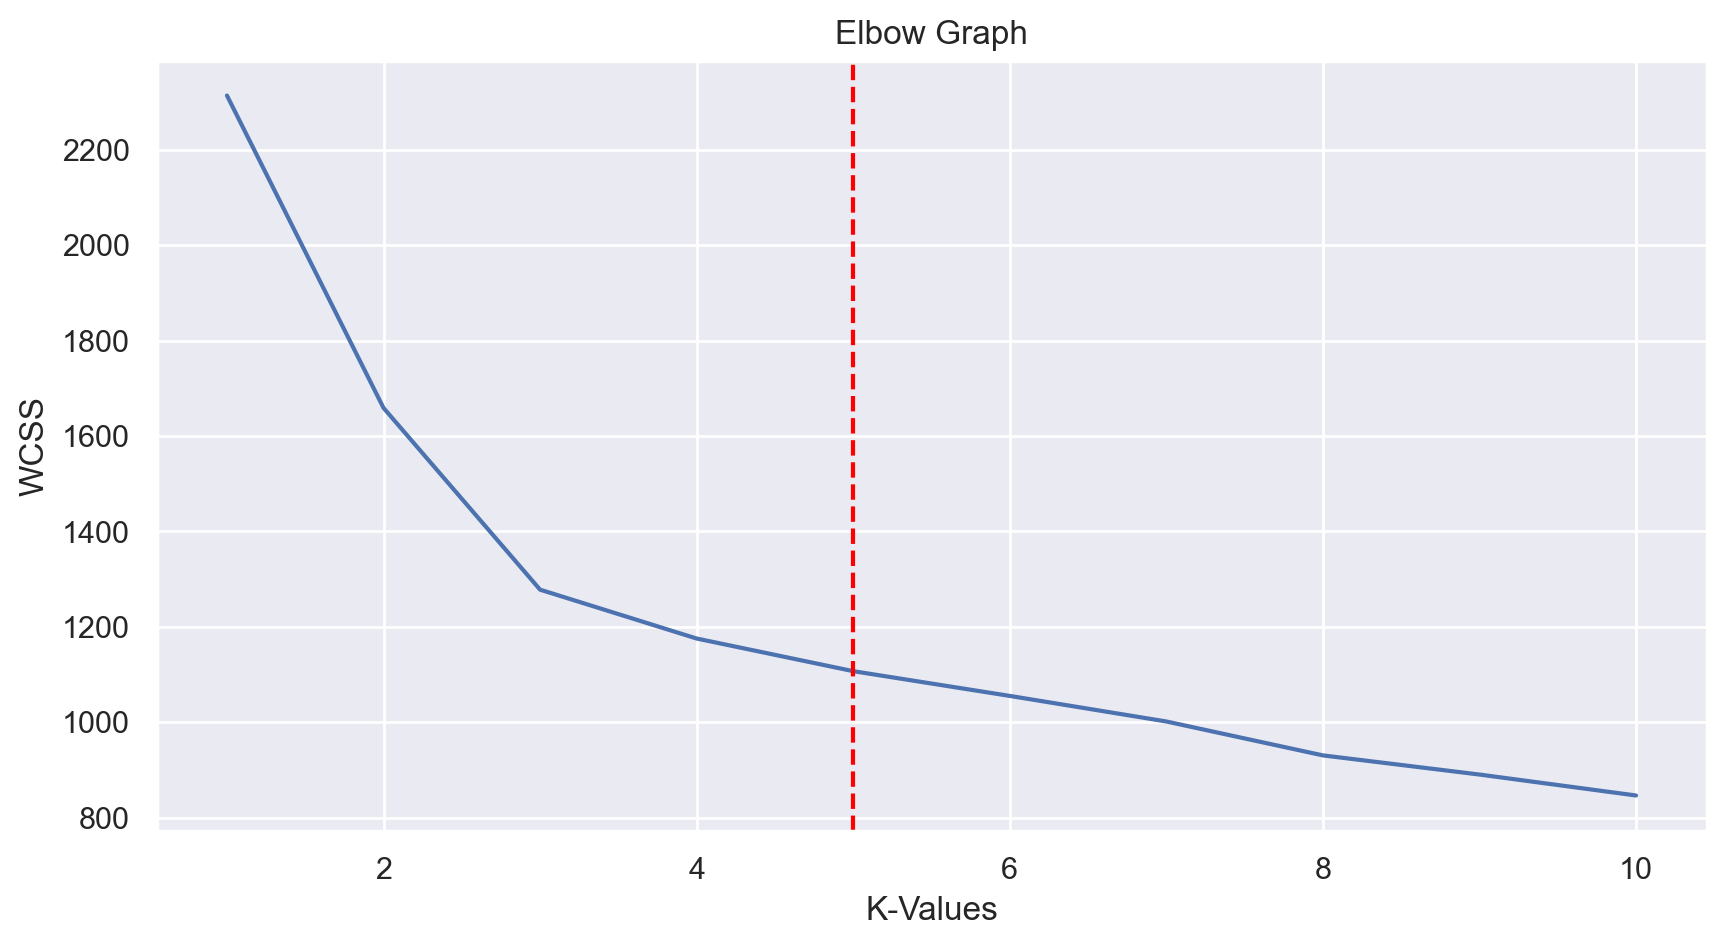

In [75]:
plt.plot(range(1,11),wcss)
plt.axvline(x = 5, linestyle = '--', color = 'red')
plt.xlabel('K-Values')
plt.ylabel('WCSS')
plt.title('Elbow Graph')

# Using n_cluster=5 we are building model 

In [ ]:
#km = KMeans(n_clusters=5)
#ypred1 = km.fit_predict=(x)
#ypred1
km = KMeans(n_clusters=5)
ypredd = km.fit_predict(x)
ypredd

In [87]:
silhouette_score(x,ypredd)

0.23063907537212183